In [25]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud #pip install wordcloud

definicion de las palabras a buscar en los abstracts 

In [5]:
categorias = {
    "Habilidades": [
      "Abstraction",
      "Algorithm",
      "Algorithmic thinking",
      "Coding",
      "Collaboration",
      "Cooperation",
      "Creativity",
      "Critical thinking",
      "Debug",
      "Decomposition",
      "Evaluation",
      "Generalization",
      "Logic",
      "Logical thinking",
      "Modularity",
      "Patterns recognition",
      "Problem solving",
      "Programming",
      "Representation",
      "Reuse",
      "Simulation"
    ],
    "Conceptos Computacionales": [
      "Conditionals",
      "Control structures",
      "Directions",
      "Events",
      "Functions",
      "Loops",
      "Modular structure",
      "Parallelism",
      "Sequences",
      "Software/hardware",
      "Variables"
    ],
    "Actitudes": [
      "Emotional",
      "Engagement",
      "Motivation",
      "Perceptions",
      "Persistence",
      "Self-efficacy",
      "Self-perceived"
    ],
    "Propiedades psicométricas": [
      "Classical Test Theory - CTT",
      "Confirmatory Factor Analysis - CFA",
      "Exploratory Factor Analysis - EFA",
      "Item Response Theory - IRT",
      "Reliability",
      "Structural Equation Model - SEM",
      "Validity"
    ],
    "Herramienta de evaluación": [
      "Beginners Computational Thinking test - BCTt",
      "Coding Attitudes Survey - ESCAS",
      "Collaborative Computing Observation Instrument",
      "Competent Computational Thinking test - cCTt",
      "Computational thinking skills test - CTST",
      "Computational concepts",
      "Computational Thinking Assessment for Chinese Elementary Students - CTA-CES",
      "Computational Thinking Challenge - CTC",
      "Computational Thinking Levels Scale - CTLS",
      "Computational Thinking Scale - CTS",
      "Computational Thinking Skill Levels Scale - CTS",
      "Computational Thinking Test - CTt",
      "Computational Thinking Test for Elementary School Students - CTT-ES",
      "Computational Thinking Test for Lower Primary - CTtLP",
      "Computational thinking-skill tasks on numbers and arithmetic",
      "Computerized Adaptive Programming Concepts Test - CAPCT",
      "CT scale - CTS",
      "Elementary Student Coding Attitudes Survey - ESCAS",
      "General self-efficacy scale",
      "ICT competency test",
      "Instrument of computational identity",
      "KBIT fluid intelligence subtest",
      "Mastery of computational concepts Test and an Algorithmic Test",
      "Multidimensional 21st Century Skills Scale",
      "Self-efficacy scale",
      "STEM learning attitude scale - STEM-LAS",
      "The computational thinking scale",
      "No experimental",
      "Experimental",
      "Longitudinal research",
      "Mixed methods",
      "Post-test",
      "Pre-test",
      "Quasi-experiments"
    ],
    "Nivel de escolaridad": [
      "Upper elementary education",
       "Upper elementary school",
      "Primary school" ,
      "Primary education",
      "Elementary school",
      "Early childhood education",
      "Kindergarten",
      "Preschool",
      "Secondary school",
      "Secondary education",
      "High school",
      "higher education",
      "University - College"
    ],
    "Medio": [
      "Block programming",
      "Mobile application",
      "Pair programming",
      "Plugged activities",
      "Programming"
    ],
    "Estrategia": [
      "Construct-by-self mind mapping - CBS-MM",
      "Construct-on-scaffold mind mapping - COS-MM",
      "Design-based learning - CTDBL",
      "Design-based learning - DBL",
      "Evidence-centred design approach",
      "Gamification",
      "Reverse engineering pedagogy - REP",
      "Technology-enhanced learning",
      "Collaborative learning",
      "Cooperative learning",
      "Flipped classroom",
      "Game-based learning",
      "Inquiry-based learning",
      "Personalized learning",
      "Problem-based learning",
      "Project-based learning",
      "Universal design for learning"
    ],
    "Herramienta": [
      "Alice",
      "Arduino",
      "Scratch",
      "ScratchJr",
      "Blockly Games",
      "Code.org",
      "Codecombat",
      "CSUnplugged",
      "Robot Turtles",
      "Hello Ruby",
      "Kodable",
      "LightbotJr",
      "KIBO robots",
      "BEE BOT",
      "CUBETTO",
      "Minecraft",
      "Agent Sheets",
      "Mimo",
      "Py" ,
      "Learn",
      "SpaceChem"
    ]

}
articulos = pd.read_csv('../CSV final/baseDatosFinal.csv')
listaAbstract = listaFechas = articulos["Abstract"].tolist()

Metodo para contar las apariciones de las categorias y palabras en los abstracts

In [6]:

def contarAparicionesVariablesAbstract(listaAbstract, categorias):
    # Combinar todos los resúmenes en una sola cadena para facilitar el conteo
    textoCompleto = ' '.join(listaAbstract)
    
    # Inicializar diccionarios para almacenar resultados
    aparicionesCategoria = {}
    
    # Contar ocurrencias de cada variable en el texto completo
    for categoria, variables in categorias.items():
        aparicionesVariable = {}
        sumCategoria = 0
        
        # Contar apariciones de cada variable (considerando sinónimos)
        for variable in variables:
            # Dividir los sinónimos si existen (separados por '-')
            sinonimos = [sinonimo.strip() for sinonimo in variable.split('- ')]
            
            # Contar apariciones de cada sinónimo y sumar
            count = sum(textoCompleto.count(sinonimo) for sinonimo in sinonimos)
            
            # Guardar el resultado total bajo el nombre de la variable principal
            aparicionesVariable[variable] = count
            sumCategoria += count
        
        # Guardar los resultados en el diccionario de categorías
        aparicionesCategoria[categoria] = [aparicionesVariable, sumCategoria]
    
    return aparicionesCategoria



Metodo para convertir en dataFrame los datos de los conteos

In [7]:
def convertirDataframe(json):
    dataFrameCategorias = [
        {"Categoria": llaveCategoria, "Apariciones": valoresCategoria[1]}
        for llaveCategoria, valoresCategoria in json.items()
    ]
    
    dataFrameVariables = [
        {"Variable": llaveVariable, "Apariciones": apariciones, "Categoria": llaveCategoria}
        for llaveCategoria, valoresCategoria in json.items()
        for llaveVariable, apariciones in valoresCategoria[0].items()
    ]
    
    return dataFrameCategorias, dataFrameVariables


Diagrama de barras por conteo de categorias

In [26]:
json = contarAparicionesVariablesAbstract(listaAbstract, categorias)
dataframe1, dataframe2 = convertirDataframe(json)
df1 = pd.DataFrame(dataframe1)

# Crear gráfico de barras agrupado
fig = px.bar(df1, x="Categoria", y="Apariciones", color="Categoria",
             title="Frecuencia de Aparición de Variables por Categoría",
             labels={"Variable": "Variable", "Frecuencia": "Frecuencia de Apariciones"})

# Mostrar gráfico
fig.show()


Mapa de calor por palabras y categorias

In [27]:

df1 = pd.DataFrame(dataframe2)
# Pivotar el DataFrame para que las categorías y variables formen una matriz
heatmap_data = df1.pivot(index="Categoria", columns="Variable", values="Apariciones").fillna(0)

# Crear el heatmap usando Plotly
fig = px.imshow(
    heatmap_data,
    labels=dict(x="Variable", y="Categoria", color="Apariciones"),
    x=heatmap_data.columns,
    y=heatmap_data.index,
    title="Frecuencia de Aparición de Variables por Categoría (Heatmap)"
)

# Mostrar el gráfico
fig.show()

Requerimiento 4

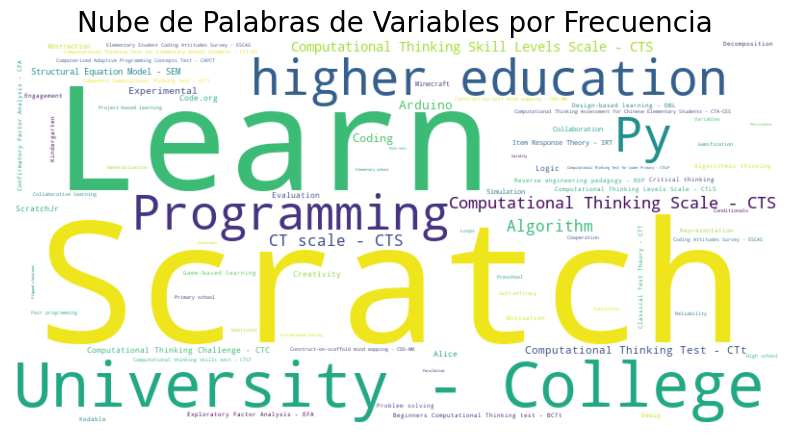

In [30]:
import matplotlib.pyplot as plt


# Crear un diccionario de palabras y su frecuencia
word_freq = {row['Variable']: row['Apariciones'] for index, row in df1.iterrows()}

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      max_words=200,
                      colormap='viridis').generate_from_frequencies(word_freq)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar los ejes
plt.title("Nube de Palabras de Variables por Frecuencia", fontsize=20)
plt.show()


In [29]:
# Repetir las variables según su frecuencia para crear la nube de palabras
words = df1.loc[df1.index.repeat(df1['Apariciones'])]

# Crear una nueva columna 'Label' con el formato deseado
words['Label'] = words['Variable'] + ': ' + words['Apariciones'].astype(str)

# Crear la nube de palabras con Plotly
fig = px.treemap(
    words,
    path=['Label'],
    values=words.index,
    title="Nube de Palabras de Variables por Frecuencia"
)

# Mostrar la gráfica
fig.show()
